GRADBOOST 

 **Collection of  Data:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving earning.csv to earning.csv


In [3]:
import io
earnings = pd.read_csv(io.BytesIO(uploaded['earning.csv']),sep=';')
pd.set_option('display.max_columns', None)

In [4]:
earnings

,year,females,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers,males,malemanagers,maleprofessionals,maletechniciansandtradesworkers,malecommunityandpersonalserviceworkers,maleclericalandadministrativeworkers,malesalesworkers,malemachineryoperatorsanddrivers,malelabourers,persons,personmanagers,personprofessionals,persontechniciansandtradesworkers,personcommunityandpersonalserviceworkers,personclericalandadministrativeworkers,personsalesworkers,personmachineryoperatorsanddrivers,personlabourers
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,Males,33.02,34.03,22.15,21.18,23.19,18.51,20.92,17.21,Persons,30.60,31.22,21.58,19.03,20.80,16.13,20.39,16.95
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,Males,33.13,34.20,21.87,22.52,23.94,19.01,21.04,17.85,Persons,31.37,31.91,21.42,19.60,21.71,16.70,21.09,17.44
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,Males,35.16,34.34,22.64,22.74,26.15,19.99,21.36,18.18,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.00,17.48
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,Males,38.85,38.85,23.97,24.56,28.52,20.82,23.06,19.68,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,Males,38.34,39.40,24.81,31.35,28.04,22.58,23.70,19.79,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85
5,2009,Females,33.30,34.72,20.19,21.00,23.81,18.02,21.46,17.90,Males,41.67,40.12,26.62,25.10,28.25,21.60,25.44,19.96,Persons,38.57,37.10,25.68,22.25,24.93,19.38,25.05,19.21
6,2010,Females,34.41,35.52,22.86,21.97,25.74,19.15,22.74,19.18,Males,41.28,41.49,27.95,26.99,30.69,23.22,27.25,21.69,Persons,38.73,38.14,27.23,23.50,27.04,20.58,26.82,20.83
7,2011,Females,35.22,36.48,23.19,23.25,26.85,19.87,22.92,19.82,Males,43.87,45.78,29.26,26.41,32.77,23.99,27.16,22.16,Persons,40.62,40.65,28.42,24.26,28.31,21.41,26.74,21.32
8,2012,Females,36.24,37.72,23.95,23.52,28.35,20.82,24.46,20.99,Males,44.24,45.24,30.94,29.03,32.90,24.49,28.88,24.18,Persons,41.28,41.07,29.90,25.25,29.47,22.16,28.52,22.99
9,2013,Females,37.26,38.95,23.90,24.50,28.38,21.61,25.02,21.75,Males,44.85,45.03,30.82,29.20,33.88,24.55,29.83,24.25,Persons,41.99,41.66,29.81,25.88,29.84,22.67,29.36,23.32


**Preparation of the Data**

In [5]:
df = earnings.copy()

In [6]:
# Let's find out more imformation on our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   year                                      14 non-null     int64  
 1   females                                   14 non-null     object 
 2   femalesmanagers                           14 non-null     float64
 3   femaleprofessionals                       14 non-null     float64
 4   femaletechniciansandtradesworkers         14 non-null     float64
 5   femalecommunityandpersonalserviceworkers  14 non-null     float64
 6   femaleclericalandadministrativeworkers    14 non-null     float64
 7   femalesalesworkers                        14 non-null     float64
 8   femalemachineryoperatorsanddrivers        14 non-null     float64
 9   femalelabourers                           14 non-null     float64
 10  males                                   

The dataset has no missing values and comprises of 14 rows and 28 columns having 24 float column data type, 3 object column data types and 1 integer column data type

In [7]:
# check for duplicate

df.duplicated().sum()

0

The dataset is void of any duplicates

In [8]:
df

,year,females,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers,males,malemanagers,maleprofessionals,maletechniciansandtradesworkers,malecommunityandpersonalserviceworkers,maleclericalandadministrativeworkers,malesalesworkers,malemachineryoperatorsanddrivers,malelabourers,persons,personmanagers,personprofessionals,persontechniciansandtradesworkers,personcommunityandpersonalserviceworkers,personclericalandadministrativeworkers,personsalesworkers,personmachineryoperatorsanddrivers,personlabourers
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,Males,33.02,34.03,22.15,21.18,23.19,18.51,20.92,17.21,Persons,30.60,31.22,21.58,19.03,20.80,16.13,20.39,16.95
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,Males,33.13,34.20,21.87,22.52,23.94,19.01,21.04,17.85,Persons,31.37,31.91,21.42,19.60,21.71,16.70,21.09,17.44
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,Males,35.16,34.34,22.64,22.74,26.15,19.99,21.36,18.18,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.00,17.48
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,Males,38.85,38.85,23.97,24.56,28.52,20.82,23.06,19.68,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,Males,38.34,39.40,24.81,31.35,28.04,22.58,23.70,19.79,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85
5,2009,Females,33.30,34.72,20.19,21.00,23.81,18.02,21.46,17.90,Males,41.67,40.12,26.62,25.10,28.25,21.60,25.44,19.96,Persons,38.57,37.10,25.68,22.25,24.93,19.38,25.05,19.21
6,2010,Females,34.41,35.52,22.86,21.97,25.74,19.15,22.74,19.18,Males,41.28,41.49,27.95,26.99,30.69,23.22,27.25,21.69,Persons,38.73,38.14,27.23,23.50,27.04,20.58,26.82,20.83
7,2011,Females,35.22,36.48,23.19,23.25,26.85,19.87,22.92,19.82,Males,43.87,45.78,29.26,26.41,32.77,23.99,27.16,22.16,Persons,40.62,40.65,28.42,24.26,28.31,21.41,26.74,21.32
8,2012,Females,36.24,37.72,23.95,23.52,28.35,20.82,24.46,20.99,Males,44.24,45.24,30.94,29.03,32.90,24.49,28.88,24.18,Persons,41.28,41.07,29.90,25.25,29.47,22.16,28.52,22.99
9,2013,Females,37.26,38.95,23.90,24.50,28.38,21.61,25.02,21.75,Males,44.85,45.03,30.82,29.20,33.88,24.55,29.83,24.25,Persons,41.99,41.66,29.81,25.88,29.84,22.67,29.36,23.32


In [9]:
#Let's verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   year                                      14 non-null     int64  
 1   females                                   14 non-null     object 
 2   femalesmanagers                           14 non-null     float64
 3   femaleprofessionals                       14 non-null     float64
 4   femaletechniciansandtradesworkers         14 non-null     float64
 5   femalecommunityandpersonalserviceworkers  14 non-null     float64
 6   femaleclericalandadministrativeworkers    14 non-null     float64
 7   femalesalesworkers                        14 non-null     float64
 8   femalemachineryoperatorsanddrivers        14 non-null     float64
 9   femalelabourers                           14 non-null     float64
 10  males                                   

Everything looks good.

Data is ready for Exploratory Data Analysis.

**Exploratory Data Analysis(EDA)**

# EDA (KAWO)

In [10]:
df

,year,females,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers,males,malemanagers,maleprofessionals,maletechniciansandtradesworkers,malecommunityandpersonalserviceworkers,maleclericalandadministrativeworkers,malesalesworkers,malemachineryoperatorsanddrivers,malelabourers,persons,personmanagers,personprofessionals,persontechniciansandtradesworkers,personcommunityandpersonalserviceworkers,personclericalandadministrativeworkers,personsalesworkers,personmachineryoperatorsanddrivers,personlabourers
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,Males,33.02,34.03,22.15,21.18,23.19,18.51,20.92,17.21,Persons,30.60,31.22,21.58,19.03,20.80,16.13,20.39,16.95
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,Males,33.13,34.20,21.87,22.52,23.94,19.01,21.04,17.85,Persons,31.37,31.91,21.42,19.60,21.71,16.70,21.09,17.44
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,Males,35.16,34.34,22.64,22.74,26.15,19.99,21.36,18.18,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.00,17.48
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,Males,38.85,38.85,23.97,24.56,28.52,20.82,23.06,19.68,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,Males,38.34,39.40,24.81,31.35,28.04,22.58,23.70,19.79,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85
5,2009,Females,33.30,34.72,20.19,21.00,23.81,18.02,21.46,17.90,Males,41.67,40.12,26.62,25.10,28.25,21.60,25.44,19.96,Persons,38.57,37.10,25.68,22.25,24.93,19.38,25.05,19.21
6,2010,Females,34.41,35.52,22.86,21.97,25.74,19.15,22.74,19.18,Males,41.28,41.49,27.95,26.99,30.69,23.22,27.25,21.69,Persons,38.73,38.14,27.23,23.50,27.04,20.58,26.82,20.83
7,2011,Females,35.22,36.48,23.19,23.25,26.85,19.87,22.92,19.82,Males,43.87,45.78,29.26,26.41,32.77,23.99,27.16,22.16,Persons,40.62,40.65,28.42,24.26,28.31,21.41,26.74,21.32
8,2012,Females,36.24,37.72,23.95,23.52,28.35,20.82,24.46,20.99,Males,44.24,45.24,30.94,29.03,32.90,24.49,28.88,24.18,Persons,41.28,41.07,29.90,25.25,29.47,22.16,28.52,22.99
9,2013,Females,37.26,38.95,23.90,24.50,28.38,21.61,25.02,21.75,Males,44.85,45.03,30.82,29.20,33.88,24.55,29.83,24.25,Persons,41.99,41.66,29.81,25.88,29.84,22.67,29.36,23.32


In [11]:
column_we_want= df.iloc[:, 2:17]

In [12]:
column_we_want

,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers,males,malemanagers,maleprofessionals,maletechniciansandtradesworkers,malecommunityandpersonalserviceworkers,maleclericalandadministrativeworkers,malesalesworkers
0,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,Males,33.02,34.03,22.15,21.18,23.19,18.51
1,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,Males,33.13,34.20,21.87,22.52,23.94,19.01
2,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,Males,35.16,34.34,22.64,22.74,26.15,19.99
3,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,Males,38.85,38.85,23.97,24.56,28.52,20.82
4,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,Males,38.34,39.40,24.81,31.35,28.04,22.58
5,33.30,34.72,20.19,21.00,23.81,18.02,21.46,17.90,Males,41.67,40.12,26.62,25.10,28.25,21.60
6,34.41,35.52,22.86,21.97,25.74,19.15,22.74,19.18,Males,41.28,41.49,27.95,26.99,30.69,23.22
7,35.22,36.48,23.19,23.25,26.85,19.87,22.92,19.82,Males,43.87,45.78,29.26,26.41,32.77,23.99
8,36.24,37.72,23.95,23.52,28.35,20.82,24.46,20.99,Males,44.24,45.24,30.94,29.03,32.90,24.49
9,37.26,38.95,23.90,24.50,28.38,21.61,25.02,21.75,Males,44.85,45.03,30.82,29.20,33.88,24.55


In [13]:

column_we_want.corr()

,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers,malemanagers,maleprofessionals,maletechniciansandtradesworkers,malecommunityandpersonalserviceworkers,maleclericalandadministrativeworkers,malesalesworkers
femalesmanagers,1.000000,0.959186,0.953424,0.945093,0.963037,0.944676,0.893589,0.941885,0.967935,0.954244,0.912211,0.876021,0.965334,0.950046
femaleprofessionals,0.959186,1.000000,0.976795,0.981519,0.990663,0.979037,0.963176,0.984626,0.980727,0.976063,0.960540,0.875659,0.970418,0.969461
femaletechniciansandtradesworkers,0.953424,0.976795,1.000000,0.963014,0.985449,0.962614,0.945091,0.965661,0.967335,0.976798,0.957083,0.852128,0.968565,0.938285
femalecommunityandpersonalserviceworkers,0.945093,0.981519,0.963014,1.000000,0.988512,0.989269,0.937201,0.982285,0.980178,0.983504,0.982419,0.887083,0.983771,0.977661
femaleclericalandadministrativeworkers,0.963037,0.990663,0.985449,0.988512,1.000000,0.986309,0.948852,0.986965,0.985100,0.985799,0.976597,0.890549,0.989208,0.977495
femalesalesworkers,0.944676,0.979037,0.962614,0.989269,0.986309,1.000000,0.922610,0.980989,0.978259,0.971948,0.976021,0.869210,0.985448,0.972291
femalemachineryoperatorsanddrivers,0.893589,0.963176,0.945091,0.937201,0.948852,0.922610,1.000000,0.949738,0.918619,0.933339,0.921576,0.836000,0.902968,0.910771
femalelabourers,0.941885,0.984626,0.965661,0.982285,0.986965,0.980989,0.949738,1.000000,0.962953,0.966381,0.966258,0.847284,0.970088,0.964701
malemanagers,0.967935,0.980727,0.967335,0.980178,0.985100,0.978259,0.918619,0.962953,1.000000,0.988620,0.975955,0.871154,0.985787,0.962637
maleprofessionals,0.954244,0.976063,0.976798,0.983504,0.985799,0.971948,0.933339,0.966381,0.988620,1.000000,0.980468,0.873140,0.979124,0.955286


Seperating the female and male salaries in 2 different tables

In [14]:
female_data= df[['year', 'femalesmanagers', 'femaleprofessionals',
       'femaletechniciansandtradesworkers',
       'femalecommunityandpersonalserviceworkers',
       'femaleclericalandadministrativeworkers', 'femalesalesworkers',
       'femalemachineryoperatorsanddrivers', 'femalelabourers']]
male_data= df[['year','malemanagers',
       'maleprofessionals', 'maletechniciansandtradesworkers',
       'malecommunityandpersonalserviceworkers',
       'maleclericalandadministrativeworkers', 'malesalesworkers',
       'malemachineryoperatorsanddrivers', 'malelabourers']]

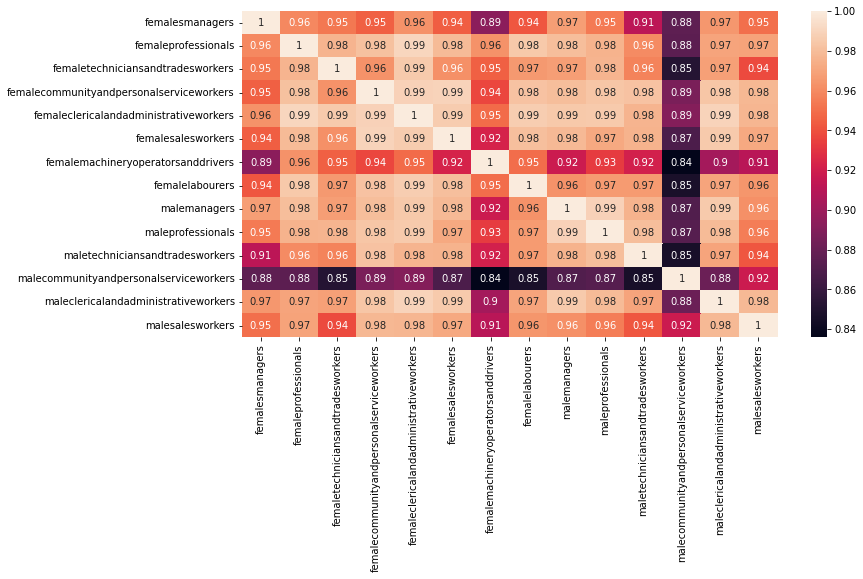

In [15]:
fig,ax = plt.subplots(figsize =(12,6))
sns.heatmap(column_we_want.corr(), annot=True)


In [16]:
df.columns

Index(['year', 'females', 'femalesmanagers', 'femaleprofessionals',
       'femaletechniciansandtradesworkers',
       'femalecommunityandpersonalserviceworkers',
       'femaleclericalandadministrativeworkers', 'femalesalesworkers',
       'femalemachineryoperatorsanddrivers', 'femalelabourers', 'males',
       'malemanagers', 'maleprofessionals', 'maletechniciansandtradesworkers',
       'malecommunityandpersonalserviceworkers',
       'maleclericalandadministrativeworkers', 'malesalesworkers',
       'malemachineryoperatorsanddrivers', 'malelabourers', 'persons',
       'personmanagers', 'personprofessionals',
       'persontechniciansandtradesworkers',
       'personcommunityandpersonalserviceworkers',
       'personclericalandadministrativeworkers', 'personsalesworkers',
       'personmachineryoperatorsanddrivers', 'personlabourers'],
      dtype='object')

In [17]:
male_data

,year,malemanagers,maleprofessionals,maletechniciansandtradesworkers,malecommunityandpersonalserviceworkers,maleclericalandadministrativeworkers,malesalesworkers,malemachineryoperatorsanddrivers,malelabourers
0,2004,33.02,34.03,22.15,21.18,23.19,18.51,20.92,17.21
1,2005,33.13,34.20,21.87,22.52,23.94,19.01,21.04,17.85
2,2006,35.16,34.34,22.64,22.74,26.15,19.99,21.36,18.18
3,2007,38.85,38.85,23.97,24.56,28.52,20.82,23.06,19.68
4,2008,38.34,39.40,24.81,31.35,28.04,22.58,23.70,19.79
5,2009,41.67,40.12,26.62,25.10,28.25,21.60,25.44,19.96
6,2010,41.28,41.49,27.95,26.99,30.69,23.22,27.25,21.69
7,2011,43.87,45.78,29.26,26.41,32.77,23.99,27.16,22.16
8,2012,44.24,45.24,30.94,29.03,32.90,24.49,28.88,24.18
9,2013,44.85,45.03,30.82,29.20,33.88,24.55,29.83,24.25


In [18]:
female_data.describe()

,year,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2010.5000,35.964286,37.065714,22.979286,22.597857,26.558571,19.630714,23.685000,19.953571
std,4.1833,6.134298,6.119284,3.488287,3.277464,4.516377,3.383354,5.075312,3.054882
min,2004.0000,26.140000,29.020000,17.900000,18.010000,19.980000,14.790000,16.270000,16.320000
25%,2007.2500,32.835000,32.180000,20.217500,20.130000,23.370000,16.945000,20.567500,17.337500
50%,2010.5000,35.730000,36.000000,23.025000,22.610000,26.295000,19.510000,22.830000,19.500000
75%,2013.7500,40.905000,42.835000,25.697500,24.882500,30.735000,22.112500,28.552500,22.417500
max,2017.0000,46.020000,47.040000,28.300000,27.840000,33.540000,26.110000,31.910000,24.900000


In [19]:
male_data.describe()

,year,malemanagers,maleprofessionals,maletechniciansandtradesworkers,malecommunityandpersonalserviceworkers,maleclericalandadministrativeworkers,malesalesworkers,malemachineryoperatorsanddrivers,malelabourers
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2010.5000,42.518571,43.027143,28.033571,27.697143,31.219286,23.610000,26.629286,21.987143
std,4.1833,6.324777,6.511193,4.343160,4.054343,5.064892,3.506102,4.064915,3.258960
min,2004.0000,33.020000,34.030000,21.870000,21.180000,23.190000,18.510000,20.920000,17.210000
25%,2007.2500,38.467500,38.987500,24.180000,24.695000,28.092500,21.015000,23.220000,19.707500
50%,2010.5000,42.770000,43.260000,28.605000,28.010000,31.730000,23.605000,27.205000,21.925000
75%,2013.7500,47.977500,48.562500,31.697500,31.197500,35.260000,25.630000,29.785000,24.610000
max,2017.0000,52.510000,52.910000,34.250000,33.350000,39.400000,29.620000,33.120000,27.280000


In [20]:
female_data_mean= np.mean(female_data.drop('year',axis =1))
male_data_mean= np.mean(male_data.drop('year',axis =1))
male_data_mean

malemanagers                              42.518571
maleprofessionals                         43.027143
maletechniciansandtradesworkers           28.033571
malecommunityandpersonalserviceworkers    27.697143
maleclericalandadministrativeworkers      31.219286
malesalesworkers                          23.610000
malemachineryoperatorsanddrivers          26.629286
malelabourers                             21.987143
dtype: float64

In [21]:
female_data

,year,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers
0,2004,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48
1,2005,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71
2,2006,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32
3,2007,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54
4,2008,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27
5,2009,33.30,34.72,20.19,21.00,23.81,18.02,21.46,17.90
6,2010,34.41,35.52,22.86,21.97,25.74,19.15,22.74,19.18
7,2011,35.22,36.48,23.19,23.25,26.85,19.87,22.92,19.82
8,2012,36.24,37.72,23.95,23.52,28.35,20.82,24.46,20.99
9,2013,37.26,38.95,23.90,24.50,28.38,21.61,25.02,21.75


Text(0.5, 1.0, 'Female gender pay categories')

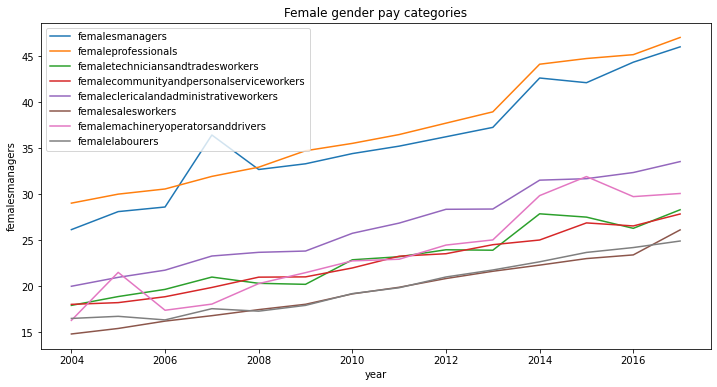

In [22]:
['year', 'femalesmanagers', 'femaleprofessionals',
       'femaletechniciansandtradesworkers',
       'femalecommunityandpersonalserviceworkers',
       'femaleclericalandadministrativeworkers', 'femalesalesworkers',
       'femalemachineryoperatorsanddrivers', 'femalelabourers']
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(x = 'year',y ='femalesmanagers',data=female_data,label='femalesmanagers' )
sns.lineplot(x = 'year',y ='femaleprofessionals',data=female_data,label='femaleprofessionals' )
sns.lineplot(x = 'year',y ='femaletechniciansandtradesworkers',data=female_data,label='femaletechniciansandtradesworkers' )
sns.lineplot(x = 'year',y ='femalecommunityandpersonalserviceworkers',data=female_data,label='femalecommunityandpersonalserviceworkers' )
sns.lineplot(x = 'year',y ='femaleclericalandadministrativeworkers',data=female_data,label='femaleclericalandadministrativeworkers' )
sns.lineplot(x = 'year',y ='femalesalesworkers',data=female_data,label='femalesalesworkers')
sns.lineplot(x = 'year',y ='femalemachineryoperatorsanddrivers',data=female_data,label='femalemachineryoperatorsanddrivers')
sns.lineplot(x = 'year',y ='femalelabourers',data=female_data,label='femalelabourers')
plt.title('Female gender pay categories')

Text(0.5, 1.0, 'Female gender pay categories')

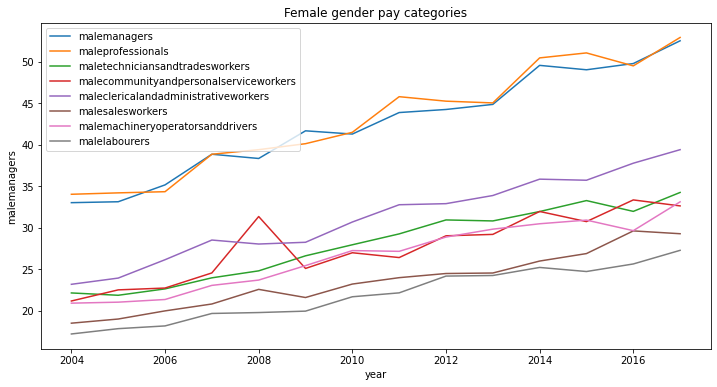

In [23]:
['year','malemanagers',
       'maleprofessionals', 'maletechniciansandtradesworkers',
       'malecommunityandpersonalserviceworkers',
       'maleclericalandadministrativeworkers', 'malesalesworkers',
       'malemachineryoperatorsanddrivers', 'malelabourers']
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(x = 'year',y ='malemanagers',data=male_data,label='malemanagers' )
sns.lineplot(x = 'year',y ='maleprofessionals',data=male_data,label='maleprofessionals' )
sns.lineplot(x = 'year',y ='maletechniciansandtradesworkers',data=male_data,label='maletechniciansandtradesworkers' )
sns.lineplot(x = 'year',y ='malecommunityandpersonalserviceworkers',data=male_data,label='malecommunityandpersonalserviceworkers' )
sns.lineplot(x = 'year',y ='maleclericalandadministrativeworkers',data=male_data,label='maleclericalandadministrativeworkers' )
sns.lineplot(x = 'year',y ='malesalesworkers',data=male_data,label='malesalesworkers')
sns.lineplot(x = 'year',y ='malemachineryoperatorsanddrivers',data=male_data,label='malemachineryoperatorsanddrivers')
sns.lineplot(x = 'year',y ='malelabourers',data=male_data,label='malelabourers')
plt.title('Female gender pay categories')

Comparison of male and female Job pay trend 

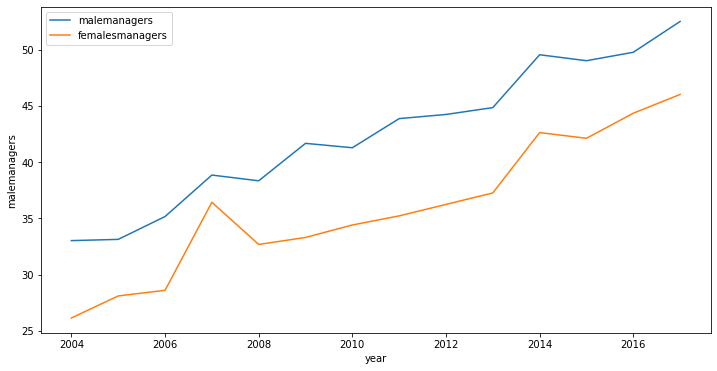

In [24]:
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(x = 'year',y ='malemanagers',data=male_data,label='malemanagers' )
sns.lineplot(x = 'year',y ='femalesmanagers',data=female_data,label='femalesmanagers' )


Text(0.5, 1.0, 'Professionals  pay over the years')

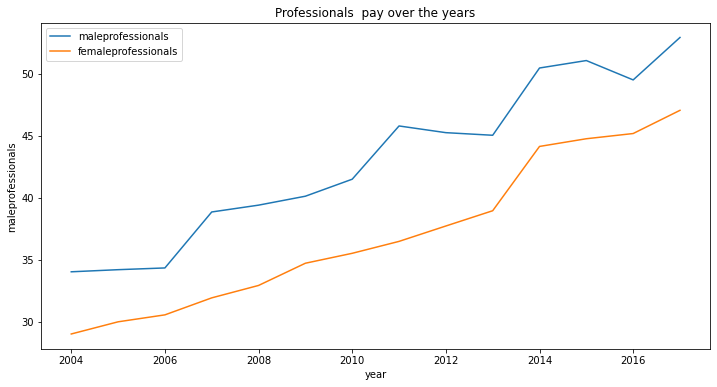

In [25]:
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(x = 'year',y ='maleprofessionals',data=male_data,label='maleprofessionals' )
sns.lineplot(x = 'year',y ='femaleprofessionals',data=female_data,label='femaleprofessionals' )
plt.title('Professionals  pay over the years')

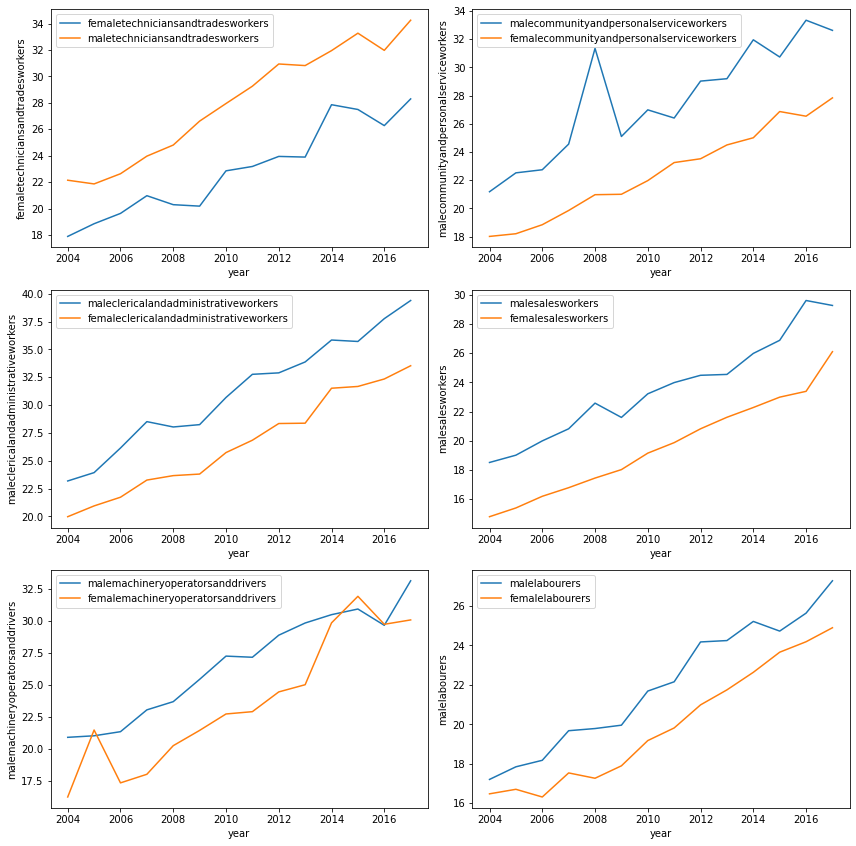

In [26]:
fig, ax = plt.subplots( 3,2,figsize = (12,12))
sns.lineplot(x = 'year',y ='femaletechniciansandtradesworkers',data=female_data,label='femaletechniciansandtradesworkers',ax = ax[0,0] )
sns.lineplot(x = 'year',y ='maletechniciansandtradesworkers',data=male_data,label='maletechniciansandtradesworkers',ax = ax[0,0])
sns.lineplot(x = 'year',y ='malecommunityandpersonalserviceworkers',data=male_data,label='malecommunityandpersonalserviceworkers',ax=ax[0,1])
sns.lineplot(x = 'year',y ='femalecommunityandpersonalserviceworkers',data=female_data,label='femalecommunityandpersonalserviceworkers' ,ax = ax[0,1])
sns.lineplot(x = 'year',y ='maleclericalandadministrativeworkers',data=male_data,label='maleclericalandadministrativeworkers',ax = ax[1,0])
sns.lineplot(x = 'year',y ='femaleclericalandadministrativeworkers',data=female_data,label='femaleclericalandadministrativeworkers' ,ax = ax[1,0])
sns.lineplot(x = 'year',y ='malesalesworkers',data=male_data,label='malesalesworkers',ax=ax[1,1])
sns.lineplot(x = 'year',y ='femalesalesworkers',data=female_data,label='femalesalesworkers',ax =ax[1,1])
sns.lineplot(x = 'year',y ='malemachineryoperatorsanddrivers',data=male_data,label='malemachineryoperatorsanddrivers',ax = ax[2,0])
sns.lineplot(x = 'year',y ='femalemachineryoperatorsanddrivers',data=female_data,label='femalemachineryoperatorsanddrivers',ax = ax[2,0])
sns.lineplot(x = 'year',y ='malelabourers',data=male_data,label='malelabourers',ax  =ax[2,1])
sns.lineplot(x = 'year',y ='femalelabourers',data=female_data,label='femalelabourers',ax = ax[2,1])




plt.tight_layout()

The following graphs show the obvious gap between both genders for various job titles, however it was noticed that for certain year females had greater pay for machinery operators and drivers. Hence we will dive deeper to the factors that affects the pay of both genders.

The following insights were gathered from the data after observing results from statistics and plots.
from the data it can be inferred that over the years (from 2004-2016). There has been a payrise for all categories in similar proportion.


# Formatting the Dataset to Reduce Cardinality and Unnecessary Repetition

## Data Cleaning

## a. Validation

In [27]:
# Checking column validity

# Checking unique column values
for col in earnings.columns:
  unique_vals = earnings[col].unique()
  if len(unique_vals) < 2:
    print(f'{col}: {unique_vals}')

females: ['Females']
males: ['Males']
persons: ['Persons']


### Removing unnecessary columns

The columns above will be dropped as they are redundant.

In [28]:
# Dropping columns
cleaned = earnings.drop(['females', 'males', 'persons'], axis = 1)

In [29]:
# Confirming changes
earnings.shape[1] - cleaned.shape[1]

3

Columns have been dropped.

### Reducing cardinality

In [30]:
# Columns
cleaned.columns

Index(['year', 'femalesmanagers', 'femaleprofessionals',
       'femaletechniciansandtradesworkers',
       'femalecommunityandpersonalserviceworkers',
       'femaleclericalandadministrativeworkers', 'femalesalesworkers',
       'femalemachineryoperatorsanddrivers', 'femalelabourers', 'malemanagers',
       'maleprofessionals', 'maletechniciansandtradesworkers',
       'malecommunityandpersonalserviceworkers',
       'maleclericalandadministrativeworkers', 'malesalesworkers',
       'malemachineryoperatorsanddrivers', 'malelabourers', 'personmanagers',
       'personprofessionals', 'persontechniciansandtradesworkers',
       'personcommunityandpersonalserviceworkers',
       'personclericalandadministrativeworkers', 'personsalesworkers',
       'personmachineryoperatorsanddrivers', 'personlabourers'],
      dtype='object')

In [31]:
# Unique jobs
columns = list(cleaned.columns)
unique_jobs = 0
jobs = set
for col in columns:
  if 'female' in col:
    unique_jobs += 1


print(unique_jobs)

8


In [32]:
# Checking if we have the correct number
cleaned.shape[1]


25

Minus the year column, the male and person columns contain 8 columns each. From a visual inspection, they seem to have the same order.

In [33]:
# Splitting tables
# Female table
female = cleaned.iloc[:, :9]
# Male table
male_cols = [0] + list(range(9,17))
male = cleaned.iloc[:, male_cols]
# Person table
person_cols = [0] + list(range(17,25))
person = cleaned.iloc[:, person_cols]

In [34]:
# Available jobs +  year column
jobs = [col.replace('female', '') for col in female.columns]
jobs[1] = 'managers' # As the first occupation has females instead of female 
# like the rest.
jobs

['year',
 'managers',
 'professionals',
 'techniciansandtradesworkers',
 'communityandpersonalserviceworkers',
 'clericalandadministrativeworkers',
 'salesworkers',
 'machineryoperatorsanddrivers',
 'labourers']

In [35]:
# Changing table column names
female.columns = jobs
male.columns = jobs
person.columns = jobs

In [36]:
# Adding a gender column
female.loc[:, 'gender'] = 'female'
male.loc[:, 'gender'] = 'male'
person.loc[:, 'gender'] = 'person'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [37]:
# Concatenating tables
combined = pd.concat([female, male, person], ignore_index=True)
combined

,year,managers,professionals,techniciansandtradesworkers,communityandpersonalserviceworkers,clericalandadministrativeworkers,salesworkers,machineryoperatorsanddrivers,labourers,gender
0,2004,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,female
1,2005,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,female
2,2006,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,female
3,2007,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,female
4,2008,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,female
5,2009,33.30,34.72,20.19,21.00,23.81,18.02,21.46,17.90,female
6,2010,34.41,35.52,22.86,21.97,25.74,19.15,22.74,19.18,female
7,2011,35.22,36.48,23.19,23.25,26.85,19.87,22.92,19.82,female
8,2012,36.24,37.72,23.95,23.52,28.35,20.82,24.46,20.99,female
9,2013,37.26,38.95,23.90,24.50,28.38,21.61,25.02,21.75,female


In [38]:
# Combined dataset shape
combined.shape

(42, 10)

## b. Missing Values

In [39]:
# Checking for null values
combined.isnull().any().any()

False

No null values present.

## c. Checking for duplicates

In [40]:
combined.duplicated().any().any()

False

No duplicates present.

## d. Outliers

In [41]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [42]:
# Checking for presence of outliers
outliers(combined)

Number of outliers = 0
Percentage = 0.0%


There are no outliers present.

## EDA

Multiariate EDA.

In [43]:
# Specified occupations
occupations = ['managers', 'professionals', 'technicians and trades workers',
               'community and personal service workers',
               'clerical and administrative workers', 'sales workers', 
               'machinery operators and drivers', 'labourers']

In [44]:
# Column names
col_names = ['year', 'managers', 'professionals', 'technicians and trades workers',
               'community and personal service workers',
               'clerical and administrative workers', 'sales workers', 
               'machinery operators and drivers', 'labourers', 'gender']

               
# Changing column names
combined.columns = col_names               


In [45]:
combined.columns

Index(['year', 'managers', 'professionals', 'technicians and trades workers',
       'community and personal service workers',
       'clerical and administrative workers', 'sales workers',
       'machinery operators and drivers', 'labourers', 'gender'],
      dtype='object')

In [46]:
# Scaling up the earnings
combined_nopersron = combined[combined['gender'] != 'person']
combined_nopersron.iloc[:, 1:9] = combined_nopersron.iloc[:, 1:9] * 1000

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


**Annual Earnings by Gender**

In [47]:
# Histogram
import plotly.express as px
fig = px.histogram(combined_nopersron, x="year", y=['managers', 'professionals',
                                                    'technicians and trades workers',
                                                    'community and personal service workers',
                                                    'clerical and administrative workers',
                                                    'sales workers', 'machinery operators and drivers',
                                                    'labourers'],
             color = 'gender', title="Average Annual Earnings by Gender",
             histfunc = 'avg', barmode = 'group', text_auto='.2s')
fig.show()

Though the base pay increased annually, women still earned less.

**Earnings by Profession**

In [48]:
# Histogram
import plotly.express as px
fig = px.histogram(combined_nopersron, x = 'gender', y=['managers', 'professionals',
                                                        'technicians and trades workers',
                                                        'community and personal service workers',
                                                        'clerical and administrative workers',
                                                        'sales workers', 'machinery operators and drivers',
                                                        'labourers'],
                    title="Average Earnings by Profession",
             histfunc = 'avg', barmode = 'group', text_auto='.2s')
fig.show()

Men earn more than women in most of the depicted professions.

**Conclusion**

1. Men earned more than women annually, and various professions.

2. The data depicts the gender paygap but does not infer a reason for the gap, hence there is a need to get more datasets forinsights concerning the paygap.

# Glassdoor Dataset




**1. Collecting Data: ---Abel & Adeleye**

In [49]:
from google.colab import files
uploaded1 = files.upload()


Saving Glassdoor Gender Pay Gap.csv to Glassdoor Gender Pay Gap.csv


In [50]:
import io
pay_gap_glassDoor = pd.read_csv(io.BytesIO(uploaded1['Glassdoor Gender Pay Gap.csv']))
pay_gap_glassDoor

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


The data set has been taken from glassdoor and focuses on income for various job titles based on gender. As there have been many studies showcasing that women are paid less than men for the same job titles, this data set will be helpful in identifying the depth of the gender-based pay gap. The features of the data set are:



Job Title

Gender

Age: Age in years

PerfEval:Performance Evaluation score

Education : Level of Education

Dept:Department

Seniority:Seniority (No of years worked)

Base Pay:Annual Basic Pay in $

Bonus:Annual Bonus Pay

2. **Preparing the Data:----Abel & Adeleye**

In [51]:
data = pay_gap_glassDoor.copy()
data

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [52]:
#check for the number or column and rows in the df
data.shape

(1000, 9)

In [53]:
#getting information about the dataframe

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [54]:
#return a full description about the df
data.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [55]:
#checking for empty values in the dataset
data.isna().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

There are no missing values

In [56]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [57]:
data['Education'].unique()

array(['College', 'PhD', 'Masters', 'High School'], dtype=object)

In [58]:
data['Dept'].unique()

array(['Operations', 'Management', 'Administration', 'Sales',
       'Engineering'], dtype=object)

In [59]:
#dictionary containing the unique categories of data
unique_cat = {'JobTitle':data['JobTitle'].unique(),'Gender':data['Gender'].unique(),
              'Education':data['Education'].unique(),'Dept':data['Dept'].unique()}


In [60]:
#there are no duplicates in the data
data.duplicated().sum()


0

In [61]:
#grouping data based on gender
male_data = data[data['Gender']=='Male']
female_data = data[data['Gender']=='Female']
female_data

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
5,IT,Female,20,5,PhD,Operations,4,70890,10126
6,Graphic Designer,Female,20,5,College,Sales,4,67585,10541
8,Graphic Designer,Female,33,5,High School,Engineering,5,112976,9836
...,...,...,...,...,...,...,...,...,...
991,IT,Female,65,1,Masters,Administration,1,106945,2041
992,Graphic Designer,Female,63,1,College,Administration,2,81545,3418
993,Marketing Associate,Female,65,1,Masters,Administration,1,80789,1884
994,Marketing Associate,Female,64,1,PhD,Administration,2,85253,2777


From the Dataset, the following was observed: 
Jobtitle = 10
Gender = 2
Education = 4
Dept = 5

EXPLORATORY DATA ANALYSIS-----Kar Woh & Wangechi

## UNIVARIATE ANALYSIS

In [62]:
# Checking how many job titles are in the dataset
count = data.JobTitle.unique().size
print(f"There are a total of: {count} job titles in the dataset" )
data['JobTitle'].unique()

There are a total of: 10 job titles in the dataset


array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [63]:
#checking the value count for female
print(data['Gender'].value_counts()['Female'])

468


There are 468 female in the dataset

In [64]:
#checking the value count for female
print(data['Gender'].value_counts()['Male'])

532


There are 532 male in the dataset

In [65]:
# Checking how many departments are in the dataset
count = data.Dept.unique().size
print(f"There are a total of: {count} departments in the dataset" )
data['Dept'].unique()

There are a total of: 5 departments in the dataset


array(['Operations', 'Management', 'Administration', 'Sales',
       'Engineering'], dtype=object)

In [66]:
# Checking how many education levels are in the dataset
count = data.Education.unique().size
print(f"There are a total of: {count} education levels in the dataset" )
data['Education'].unique()

There are a total of: 4 education levels in the dataset


array(['College', 'PhD', 'Masters', 'High School'], dtype=object)

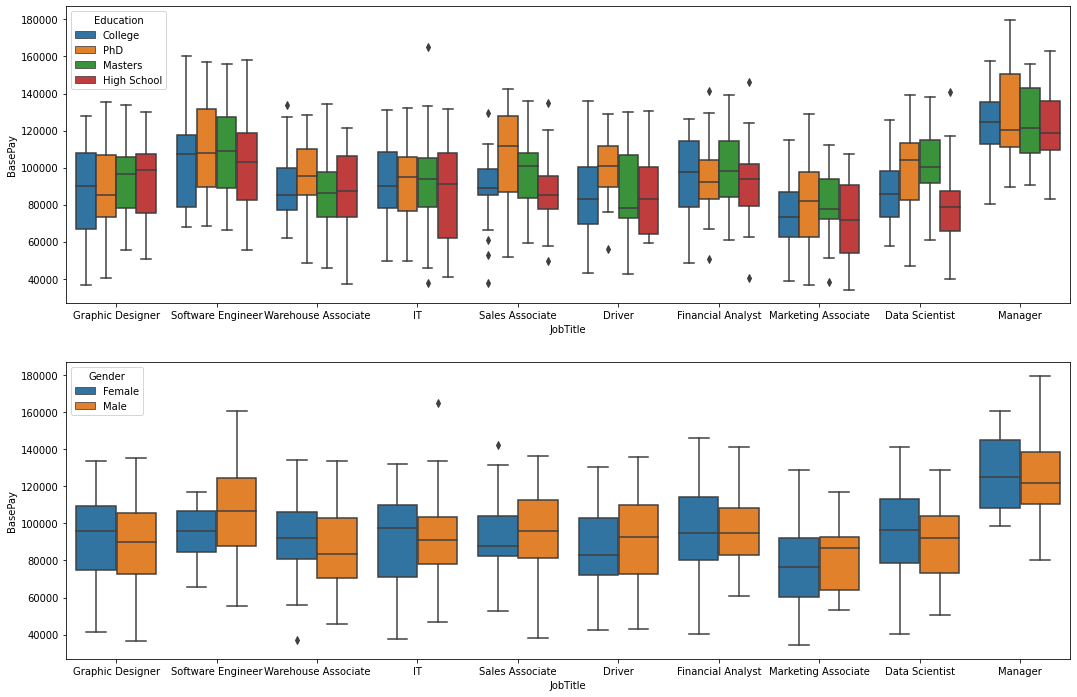

In [67]:
#OUTLIERS 
fig,ax =  plt.subplots(2,1,figsize =(18,12))
sns.boxplot(x = 'JobTitle',y = 'BasePay',data = data,hue='Education',ax=ax[0])
sns.boxplot(x = 'JobTitle',y = 'BasePay',data = data,hue='Gender',ax=ax[1])
 #there are outliers but this can be interpreted due to other factors 

In [68]:
data.groupby(['PerfEval','Gender']).count()['JobTitle']
#IT CAN BE SEEN THAT MALES HAD HIGHER PERFORMANCE EVALUATION ACROSS ALL POINTS EXCEPT LOWEST PERFORMAMNCE EVALUATION OF POINT 1 WHERE FEMALE DOMINATED THE SCORE 

PerfEval  Gender
1         Female    106
          Male       92
2         Female     90
          Male      102
3         Female     88
          Male      106
4         Female     96
          Male      111
5         Female     88
          Male      121
Name: JobTitle, dtype: int64

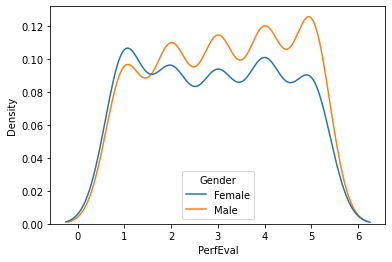

In [69]:
sns.kdeplot(x ='PerfEval',data=data ,hue='Gender')

In [70]:
data.groupby(['Seniority','Gender']).count()['JobTitle']

Seniority  Gender
1          Female     83
           Male      112
2          Female    102
           Male      107
3          Female    106
           Male      113
4          Female     80
           Male      104
5          Female     97
           Male       96
Name: JobTitle, dtype: int64

## BIVARIATE ANALYSIS

In [71]:
#comparing the base pay of each gender per department
# create sunburst chart
import plotly.express as px
fig = px.sunburst(data, path=['Gender', 'Dept'],values='BasePay',color='BasePay', color_continuous_scale='RdBu',
                 hover_data={'BasePay':':,.2f'})



#show the chart
fig.show()

From the analysis we can see that the basepay for male was higher in all departments as compared to the female.

In [72]:
#creating a Pull pie’s traces to check the % bonus each department received
import plotly.graph_objs as go


fig = go.Figure()

fig.add_trace(go.Pie(
    labels=data['Dept'], 
    values=data['Bonus'], 
    
    pull=[0, 0.1, 0]
))


fig.update_layout(
    title='Percentage bonus each department received',
)

fig.show()


Operations department received the highest bonus which is 1,332,639 which is 20.6% of the total bonus while Administration dept got the least bonus of 1,241,876 which is 19.2% of the total bonus.

In [73]:
#comparing the bonus of each gender per department
# create sunburst chart
fig = px.sunburst(data, path=['Gender', 'Dept'],values='Bonus',color='Bonus', color_continuous_scale='RdBu',
                 hover_data={'Bonus':':,.2f'})

fig.update_layout(
    title='bonus of each gender per department',
)


#show the chart
fig.show()

1. In the sales department, Female dataed a higher bonus than the male

2. In the Operations department, Male dataed a higher bonus than the Female

3. In the Administartion department, Male dataed a higher bonus than the Female

4. In the Engineering department, Male dataed a higher bonus than the Female

5. In the Management department, Male dataed a higher bonus than the Female

In [74]:
#checking if the education level affects the basepay of an individual

fig = go.Figure()
fig.add_trace(go.Bar(x=data['Education'], y=data['BasePay'] , name='Education'))


fig.update_layout(
    title='Education Level Vs Basepay',
    xaxis_title='Education',
    yaxis_title='Basepay'
)

fig.show()


We can say that Basepay is not really based on the education level. Those are the master level data the highest,followed by Phd level, then highschool level and the least is those at the college level.

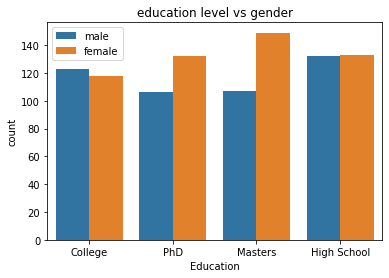

In [75]:
#education level vs gender
ax = sns.countplot(x=data['Education'], hue=data['Gender'],data=data,orient="h", alpha=1)
plt.title('education level vs gender')

plt.xticks(rotation=0)
plt.legend(["male", "female"])

plt.show()

From the analysis above, we can see most female have attained a Masters degree & PhD as compared to Male

In [76]:
#checking if the education level affects the bonus of an individual

fig = go.Figure()
fig.add_trace(go.Bar(x=data['Education'], y=data['Bonus'] , name='Education'))


fig.update_layout(
    title='Education Level Vs Bonus',
    xaxis_title='Education',
    yaxis_title='Bonus'
)

fig.show()


The Masters & Phd employees data a high bonus as compared to the employees at college and high school education level.

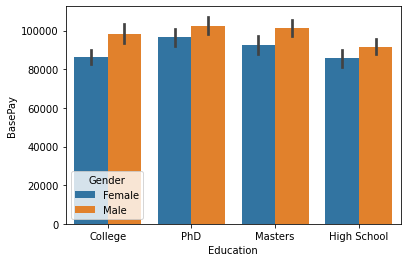

In [77]:
sns.barplot(x='Education',y='BasePay',data=data,hue='Gender')

In [78]:

# Create a scatter plot with a trend line for age and salary
fig = px.scatter(data, x='Age', y='BasePay', trendline='ols', title='Distribution of Age and BasePay',
                 labels={'Age': 'Age', 'BasePay': 'BasePay'}, hover_data={'Age': True, 'BasePay': ':$,.2f'})

fig.show()


We can see from the trendline that as age increases the basepay also increases

In [79]:
# Create a scatter plot with a trend line for age and bonus
fig = px.scatter(data, x='Age', y='Bonus', trendline='ols', title='Distribution of Age and Bonus',
                 labels={'Age': 'Age', 'Bonus': 'Bonus'}, hover_data={'Age': True, 'Bonus': ':$,.2f'})

fig.show()

From the trendline we can see as an employee grows older the lesser the bonus

## MULTIVARIATE ANALYSIS

In [80]:
data.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

In [81]:
#converting the columns to category datatype
data['JobTitle'] = data['JobTitle'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Dept'] = data['Dept'].astype('category')
data['Education'] = data['Education'].astype('category')

In [82]:
#convert categorical data to numerical using the label encoder technique

from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder()  
data['JobTitle']= label_encoder.fit_transform(data['JobTitle'])
data['Gender']= label_encoder.fit_transform(data['Gender']) 
data['Dept']= label_encoder.fit_transform(data['Dept']) 
data['Education']= label_encoder.fit_transform(data['Education'])  

data.head(5)


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,3,0,18,5,0,3,2,42363,9938
1,8,1,21,5,0,2,5,108476,11128
2,9,0,19,4,3,0,5,90208,9268
3,8,1,20,5,2,4,4,108080,10154
4,3,1,26,5,2,1,5,99464,9319


In [83]:
#plotting a correlation matrix
corr = data.corr()
corr

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
JobTitle,1.000000,0.068547,-0.017228,-0.007299,-0.017183,-0.007427,0.005238,0.046422,0.044208
Gender,0.068547,1.000000,-0.028625,0.066627,0.061612,0.003583,-0.028131,0.167766,-0.003208
Age,-0.017228,-0.028625,1.000000,-0.056875,0.019744,0.047261,-0.021414,0.562681,-0.414337
PerfEval,-0.007299,0.066627,-0.056875,1.000000,0.027383,-0.000349,-0.021127,-0.053622,0.855500
Education,-0.017183,0.061612,0.019744,0.027383,1.000000,0.000266,0.016470,0.141525,0.053530
Dept,-0.007427,0.003583,0.047261,-0.000349,0.000266,1.000000,-0.081988,0.030913,-0.065126
Seniority,0.005238,-0.028131,-0.021414,-0.021127,0.016470,-0.081988,1.000000,0.511096,0.194982
BasePay,0.046422,0.167766,0.562681,-0.053622,0.141525,0.030913,0.511096,1.000000,-0.129481
Bonus,0.044208,-0.003208,-0.414337,0.855500,0.053530,-0.065126,0.194982,-0.129481,1.000000


There is a high correlation between Basepay and Age as well as seniority. There is a high correlation between Bonus and performance evaluation, The correlation between gender and basepay is low. As well as gender and bonus is negligible There is no multicollinearity in the dataset

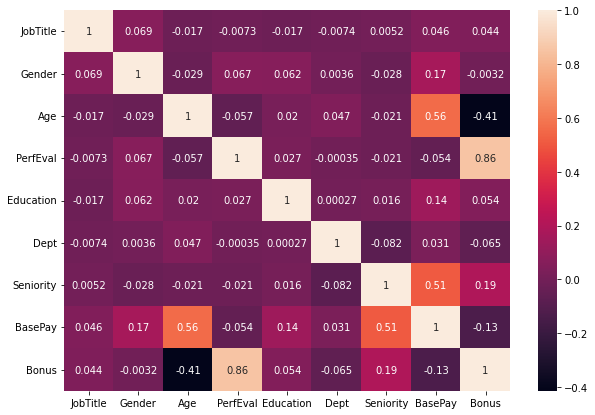

In [84]:
#plotting on a heatmap
#Checking for feature correlation
plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
     

correlation

Positive correlation: 

BasePay -- Age,Seniority,jobtitle,dept

bonus -- Jobtitle,perfeval,education

Negative Correlation
Bonus -- Age,BasePay



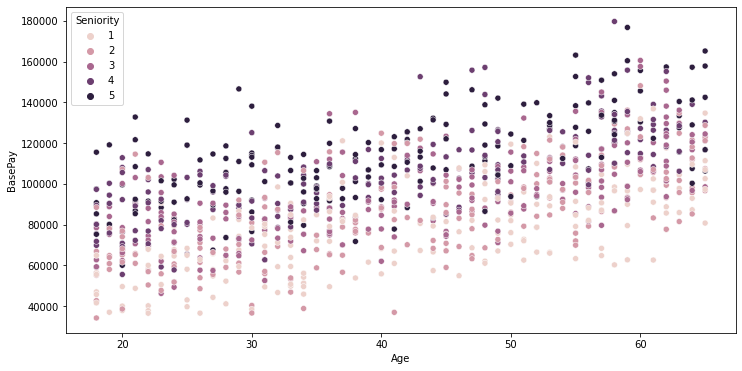

In [85]:
plt.subplots(figsize = (12,6))
sns.scatterplot(x='Age',y = 'BasePay',data=data,hue='Seniority')
# we can see as the age and seniority increases as the basepay increases

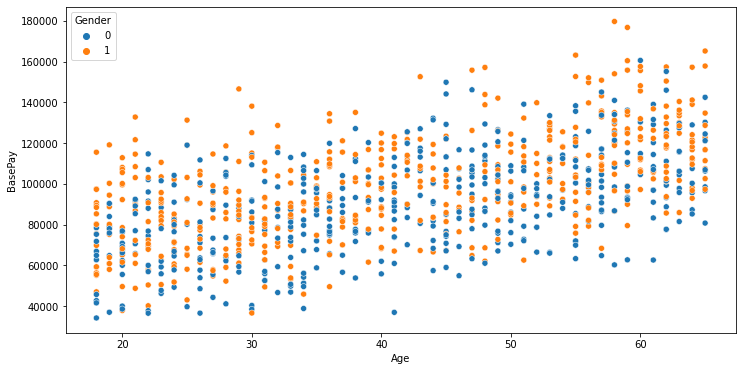

In [86]:
plt.subplots(figsize = (12,6))
sns.scatterplot(x='Age',y = 'BasePay',data=data,hue='Gender')

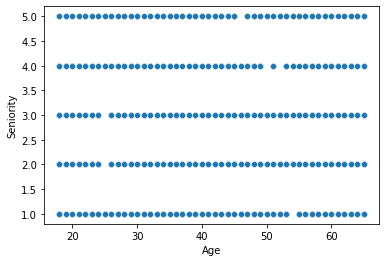

In [87]:
sns.scatterplot(x='Age',y = 'Seniority',data=data)
#this shows that seniority is not dependent on the age

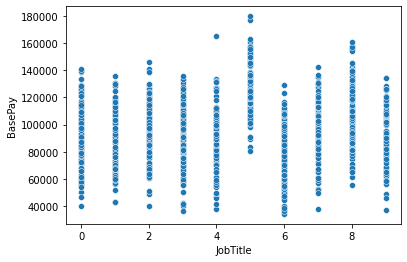

In [88]:
sns.scatterplot(x='JobTitle',y='BasePay',data=data)

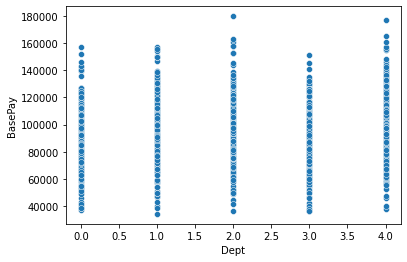

In [89]:
sns.scatterplot(x='Dept',y='BasePay',data=data)

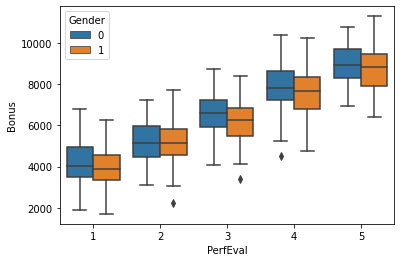

In [90]:

sns.boxplot(x='PerfEval',y='Bonus',data = data,hue='Gender')

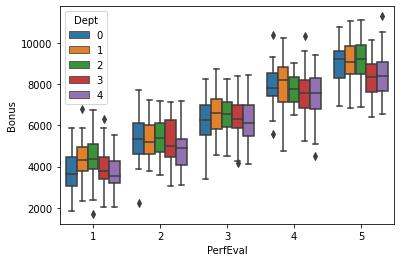

In [91]:
sns.boxplot(x='PerfEval',y='Bonus',data = data,hue='Dept')
#it is seen that the bonus increases as the performance evaluation increased based on all departments now lets dive into each department to see what happens based on gender.


**Base Pay by Age**

In [92]:
earnings2 = pay_gap_glassDoor.copy()

In [93]:
fig = px.histogram(pay_gap_glassDoor, x="Age", y="BasePay", color="Gender", histfunc = 'avg',
                   title = 'Average Base Pay by Age')
fig.show()

For employees of the same age group, men earned more than women.

In [94]:
fig = px.histogram(pay_gap_glassDoor, x="PerfEval", y="BasePay", color="Gender", histfunc = 'avg',
                   title = 'Average Base Pay by Age')
fig.show()

## Modelling ~ Deborah

In the following section, various base models will be trained to determine the model with the lowest rmse metrics. This selected model will the undergo hyperparameter tuning to further reduce the rmse.

In [95]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Encoding

Encoding categorical varaibles.

#### Explicitly encoding the 'Education' column

As a PHD is a higher education level than the rest, the Education column has been explicitly encoded to capture the correct order of education level.

In [96]:
# Education level encoding
education = {'High School': 0, 'College': 1, 'Masters': 2, 'PhD':3}

In [97]:
# Replacing the education level values with the required value.
for value in education.keys():
  earnings2.Education.replace(value, education[value], inplace = True)

# Preview
earnings2.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,1,Operations,2,42363,9938
1,Software Engineer,Male,21,5,1,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,3,Administration,5,90208,9268
3,Software Engineer,Male,20,5,2,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,2,Engineering,5,99464,9319


#### One-Hot Encoding and Label Encoding

Ideally, nominal variables are one-hot encoded, however, a copy of the dataset will undergo label encoding and their results compared to identify the dataset from which more insights into predicting the target variable can be derived.

In [98]:
# One-Hot endoding
dummies = pd.get_dummies(earnings2)

# Label encoding
# Getting the categorical columns.
cat_cols = earnings2.select_dtypes(include = 'object').columns.tolist()
# Label encoder
encoder = preprocessing.LabelEncoder()
# Creating a copy of the original dataset.
encoded = earnings2.copy()
# Encoding the categorical columns.
encoded.loc[:, cat_cols] = earnings2.loc[:, cat_cols].apply(encoder.fit_transform)

In [99]:
# Preview after One-Hot encoding.
dummies.head()

,Age,PerfEval,Education,Seniority,BasePay,Bonus,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate,Gender_Female,Gender_Male,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
0,18,5,1,2,42363,9938,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,21,5,1,5,108476,11128,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,19,4,3,5,90208,9268,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,20,5,2,4,108080,10154,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,26,5,2,5,99464,9319,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


In [100]:
# Preview after label encoding.
encoded.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,3,0,18,5,1,3,2,42363,9938
1,8,1,21,5,1,2,5,108476,11128
2,9,0,19,4,3,0,5,90208,9268
3,8,1,20,5,2,4,4,108080,10154
4,3,1,26,5,2,1,5,99464,9319


### Standard Scaling

Standard scaling to ensure that all variables are considered when deriving patterns from the data.

In [101]:
# Standard scaling
scaler = preprocessing.StandardScaler()
dummies_std = scaler.fit_transform(dummies)
encoded_std = scaler.fit_transform(encoded)

For the target column, the 'Base Pay' alone, as well as a the net pay, a summation of the 'Base Pay' and 'Bonus', will be used during modelling to determine the best target variable.

Target column indices.

* Target columns index - 4,5 - dummies
* Target columns index - -2,-1 - encoded

The scaled and original target value performance will also be copmared.

In [102]:
# Features and target

# One-Hot encoded data with y = 'BasePay'
Xd1 = np.delete(dummies_std, 4, 1)
yd1 = dummies_std[:, 4].reshape(-1, 1)

# -- with y not scaled.
yd1_noScale = dummies['BasePay'].values.reshape(-1,1)

# One-Hot encoded data with y = 'BasePay' + 'Bonus'
Xd2 = np.delete(dummies_std,np.s_[4:6],1)
yd2 = np.sum(dummies_std[:, 4:6], axis = 1)
yd2 = yd2.reshape(-1, 1)

# -- with y not scaled.
yd2_noScale = (dummies['BasePay'] + dummies['Bonus']).values.reshape(-1,1)

# Label encoded data with y = 'BasePay'
Xe1 = np.delete(encoded_std, -2, 1)
ye1 = encoded_std[:, -2].reshape(-1, 1)

# -- with y not scaled.
ye1_noScale = encoded['BasePay'].values.reshape(-1,1)


# Label encoded data with y = 'BasePay' + 'Bonus'
Xe2 = np.delete(encoded_std, np.s_[-2:], 1)
ye2 = np.sum(encoded_std[:, -2:], axis = 1)
ye2 = ye2.reshape(-1, 1)


# -- with y not scaled.
ye2_noScale = (encoded['BasePay'] + encoded['Bonus']).values.reshape(-1,1)

### Train-test-split

In [103]:
# Function used to carry out a train-test-split on the specified data sets.
def TrainTestSplit(X, y, size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, 
  random_state = 42)
  return X_train, X_test, y_train, y_test

### Scaling

In [104]:
# Standard Scaling function
def Scaling(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

### Error Metrics

In [105]:
# Model performance metrics function
def ErrorMetrics(y_test, y_pred):
  # Model performance metrics
  rmse = mean_squared_error(y_test, y_pred, squared = False).round(2)
  mse = mean_squared_error(y_test, y_pred).round(2)
  r2 = r2_score(y_test, y_pred).round(2)
  return rmse, mse, r2

### ***Note!***

The scaled and unscaled versions of the target variables have been used. This has been done so as to obtain the true(unscaled) model performance values.

### Linear Regression Model

In [106]:
# Linear regression model function.
def LinearModel(X_train, X_test, y_train, y_test):# , pre_scaled = 'no'):

  # Initializing variables
  y_pred = np.array([])
  rmse, mse, r2 = 0.0, 0.0, 0.0

  # Model function
  def Linear(X_train, X_test, y_train, y_test):
    regression=LinearRegression()
    regression.fit(X_train, y_train)
    coeff = regression.coef_
    y_pred = regression.predict(X_test)
    rmse, mse, r2 = ErrorMetrics(y_test, y_pred)
    return rmse, mse, r2, coeff

  # Function call  
  rmse, mse, r2, coeff = Linear(X_train, X_test, y_train, y_test)

  # y not pre-scaled
  # if pre_scaled == 'no':
    # Scaling
    # X_train, X_test = Scaling(X_train, X_test)
   # Regression
    # rmse, mse, r2 = Linear(X_train, X_test, y_train, y_test)
  # y = pre-scaled
  # elif pre_scaled == 'yes':
    # Regression
    # rmse, mse, r2 = Linear(X_train, X_test, y_train, y_test)
  # Invalid entry
  # else:
    # print(f'Invalid value -> pre_scaled = {pre_scaled}')
  
  # Displaying the results
  print(f'RMSE: {rmse} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  return rmse, mse, r2, np.round(coeff.reshape(-1,),2)

#### One-Hot encoding with y = Base Pay

**Pre-scaled Y**

In [107]:
# Train-test-split
X1_train, X1_test, y1_train, y1_test =TrainTestSplit(Xd1, yd1, 0.2)
# Linear model
rmse1, mse1, r21, coeff_linear_pre = LinearModel(X1_train, X1_test, y1_train, y1_test)

RMSE: 0.37 

MSE: 0.14 

R2_Score: 0.86



**Original Y**

In [108]:
# Train-test-split
X11_train, X11_test, y11_train, y11_test = TrainTestSplit(Xd1, yd1_noScale, 0.2)
# Linear model
rmse1, mse1, r21, coeff_linear_org = LinearModel(X11_train, X11_test, y11_train, y11_test)

RMSE: 9321.87 

MSE: 86897308.68 

R2_Score: 0.86



In [109]:
np.around(coeff_linear_org, 2) 

array([ 1.42079300e+04, -7.70700000e+01,  2.90690000e+03,  1.31928200e+04,
       -2.35600000e+02, -2.94920355e+16, -2.74403576e+16, -2.94920355e+16,
       -2.83663486e+16, -2.81065125e+16, -2.73041763e+16, -3.07795613e+16,
       -2.78429441e+16, -2.97330342e+16, -2.73041763e+16,  7.22311534e+16,
        7.22311534e+16,  5.68742290e+16,  5.67618308e+16,  5.74274959e+16,
        5.86979986e+16,  5.83877670e+16])

#### One-Hot encoding with y = Base Pay + Bonus

**Pre-scaled Y**

In [110]:
# Train-test-split
X2_train, X2_test, y2_train, y2_test = TrainTestSplit(Xd2, yd2, 0.2)
# Linear model
rmse2, mse2, r22, coeff = LinearModel(X2_train, X2_test, y2_train, y2_test)

RMSE: 0.47 

MSE: 0.22 

R2_Score: 0.88



**Original Y**

In [111]:
# Train-test-split
X2_train, X2_test, y2_train, y2_test = TrainTestSplit(Xd2, yd2_noScale, 0.2)
# Linear model
rmse2, mse2, r22, coeff = LinearModel(X2_train, X2_test, y2_train, y2_test)

RMSE: 9374.35 

MSE: 87878466.01 

R2_Score: 0.86



#### Label Encoding with y = Base Pay

**Pre-scaled Y**

In [112]:
# Train-test-split
X3_train, X3_test, y3_train, y3_test = TrainTestSplit(Xe1, ye1, 0.2)
# Linear model
rmse3, mse3, r23, coeff = LinearModel(X3_train, X3_test, y3_train, y3_test)

RMSE: 0.57 

MSE: 0.33 

R2_Score: 0.67



**Original Y**

In [113]:
# Train-test-split
X3_train, X3_test, y3_train, y3_test = TrainTestSplit(Xe1, ye1_noScale, 0.2)
# Linear model
rmse3, mse3, r23, coeff = LinearModel(X3_train, X3_test, y3_train, y3_test)

RMSE: 14450.46 

MSE: 208815699.91 

R2_Score: 0.67



#### Label Encoding with y = Base Pay + Bonus

**Pre-scaled Y**

In [114]:
# Train-test-split
X4_train, X4_test, y4_train, y4_test = TrainTestSplit(Xe2, ye2, 0.2)
# Linear model
rmse4, mse4, r24, coeff = LinearModel(X4_train, X4_test, y4_train, y4_test)

RMSE: 0.71 

MSE: 0.5 

R2_Score: 0.73



**Original Y**

In [115]:
# Train-test-split
X4_train, X4_test, y4_train, y4_test = TrainTestSplit(Xe2, ye2_noScale, 0.2)
# Linear model
rmse4, mse4, r24, coeff = LinearModel(X4_train, X4_test, y4_train, y4_test)

RMSE: 14771.54 

MSE: 218198410.18 

R2_Score: 0.65



#### Dataset Modelling Results

In [116]:
# Model results
data_results = {'RMSE_scaled': [0.37, 0.47, 0.57, 0.71],
                'MSE_scaled': [0.14, 0.22, 0.33, 0.5],
                'R2_Score_scaled':[0.86, 0.88, 0.67, 0.73],
                'RMSE': [9321.65 , 9374.05 , 14450.46 , 14771.54 ],
                'MSE': [86893138.66, 87872723.8, 208815699.91, 218198410.18 ],
                'R2_Score':[0.86, 0.86, 0.67, 0.65]}
# Data frame indices                
indices = ['One-Hot BasePay', 'One-Hot BasePay + Bonus', 'Label BasePay', 'Label BasePay + Bonus']
# Encoding results data frame
encoding_results = pd.DataFrame(data_results, index = indices)
# Formatting the MSE column
encoding_results.loc[:, "MSE"] = encoding_results["MSE"].map('{:,.0f}'.format)
# Sorting resluts from the lowest RMSE.
encoding_results.sort_values(['RMSE'])

,RMSE_scaled,MSE_scaled,R2_Score_scaled,RMSE,MSE,R2_Score
One-Hot BasePay,0.37,0.14,0.86,9321.65,"86,893,139",0.86
One-Hot BasePay + Bonus,0.47,0.22,0.88,9374.05,"87,872,724",0.86
Label BasePay,0.57,0.33,0.67,14450.46,"208,815,700",0.67
Label BasePay + Bonus,0.71,0.50,0.73,14771.54,"218,198,410",0.65


From the models above, the first model with y = Base pay and using One-Hot encoding leads to a better performance.

#### **Results**

The One-Hot encoded dataset with y = Base Pay will be used in the further stages as it has the lowest RMSE, and a high R2 score.

### Polynomial Regression Model

In [117]:
# Polynomial regression model function.
def PolynomialModel(X_train, X_test, y_train, y_test, degree):

  # Initializing variables
  y_pred = np.array([])
  rmse, mse, r2 = 0.0, 0.0, 0.0

  # Model function
  def Polynomial(X_train, X_test, y_train, y_test, degree):
    # Polynomial regression
    polynomial = PolynomialFeatures(degree = degree)
    X_train_poly = polynomial.fit_transform(X_train)
    X_test_poly =  polynomial.transform(X_test)
    # Regression
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    coeff = poly_reg.coef_
    # Predictions
    y_pred_poly = poly_reg.predict(X_test_poly)
    rmse, mse, r2 = ErrorMetrics(y_test, y_pred_poly)
    return rmse, mse, r2, coeff


  rmse, mse, r2, coeff = Polynomial(X_train, X_test, y_train, y_test, degree)
  
  # Displaying the results
  print(f'RMSE: {rmse} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  return rmse, mse, r2, coeff

**Pre-scaled Y**

In [118]:
# Polynomial regression model
rmse1, mse1, r21, coeff_poly_pre = PolynomialModel(X1_train, X1_test, y1_train, y1_test, 2)

RMSE: 0.41 

MSE: 0.17 

R2_Score: 0.83



**Original Y**

In [119]:
# Ridge regression model
rmse11, mse11, r211, coeff_poly_org = PolynomialModel(X11_train, X11_test, y11_train, y11_test,
                                      2)

RMSE: 10461.02 

MSE: 109433017.38 

R2_Score: 0.83



Polynomial regression with degree = 1 has the lowest error values, which is linear regression. Threfore, using polynomimla regression does not improve model performance.

### Ridge Regression Model

In [120]:
# Ridge regression model function.
def RidgeModel(X_train, X_test, y_train, y_test, alpha):

  # Initializing variables
  y_pred = np.array([])
  rmse, mse, r2 = 0.0, 0.0, 0.0

  # Model function
  def RidgeFunc(X_train, X_test, y_train, y_test, alpha):
    # Ridge regression
    regression = Ridge(alpha = alpha)
    regression.fit(X_train, y_train)
    coeff = regression.coef_
    # Predictions
    y_pred = regression.predict(X_test)
  
    rmse, mse, r2 = ErrorMetrics(y_test, y_pred)
    return rmse, mse, r2, coeff

  # Function call
  rmse, mse, r2, coeff = RidgeFunc(X_train, X_test, y_train, y_test, alpha)
  
  # Displaying the results
  print(f'RMSE: {rmse} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  return rmse, mse, r2, np.round(coeff.reshape(-1,),2)

**Pre-Scaled Y**

In [121]:
 # Ridge regression model
rmse1, mse1, r21, coeff_ridge_pre = RidgeModel(X1_train, X1_test, y1_train, y1_test, 11)

RMSE: 0.37 

MSE: 0.14 

R2_Score: 0.86



**Original Y**

In [122]:
# Ridge regression model
rmse1, mse1, r21, coeff_ridge_org = RidgeModel(X11_train, X11_test, y11_train, y11_test, 1)

RMSE: 9318.33 

MSE: 86831359.47 

R2_Score: 0.86



The values are close to those of the linear model, however, a close look at the results when the unscaled target variable is used shows that the ridge model has a higher RMSE value.

Changing the values of alpha does not improve model performance. In fact, it similar to the performance of the linear regression model.

### Lasso Regression Model

In [123]:
# Lasso regression model function.
def LassoModel(X_train, X_test, y_train, y_test, alpha, iter = 1000):

  # Initializing variables
  y_pred = np.array([])
  rmse, mse, r2 = 0.0, 0.0, 0.0

  # Model function
  def LassoFunc(X_train, X_test, y_train, y_test, alpha, iter = iter):
    # Lasso regression
    regression = Lasso(alpha = alpha, max_iter = iter)
    regression.fit(X_train, y_train)
    coeff = regression.coef_
    # Predictions
    y_pred = regression.predict(X_test)
    rmse, mse, r2 = ErrorMetrics(y_test, y_pred)
    return rmse, mse, r2, coeff

  # Function call
  rmse, mse, r2, coeff = LassoFunc(X_train, X_test, y_train, y_test, alpha)
  
  # Displaying the results
  print(f'RMSE: {rmse} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  return rmse, mse, r2, np.round(coeff.reshape(-1,),2)

**Pre-Scaled Y**

In [124]:
# Lasso Regression model
rmse1, mse1, r21, coeff_lasso_pre = LassoModel(X1_train, X1_test, y1_train, y1_test, 2)

RMSE: 0.99 

MSE: 0.99 

R2_Score: -0.0



**Original Y**

In [125]:
# Lasso Regression model
rmse1, mse1, r21, coeff_lasso_org = LassoModel(X11_train, X11_test, y11_train, y11_test, 2)

RMSE: 9316.5 

MSE: 86797084.75 

R2_Score: 0.86



Alpha = 1, model doesn't converge.

### ElasticNet Regression Model

In [126]:
# ElasticNet regression model function.
def ElasticNetModel(X_train, X_test, y_train, y_test, alpha):

  # Initializing variables
  y_pred = np.array([])
  rmse, mse, r2 = 0.0, 0.0, 0.0

  # Model function
  def ElasticNetFunc(X_train, X_test, y_train, y_test, alpha):
    # ElasticNet regression
    regression = ElasticNet(alpha = alpha)
    regression.fit(X_train, y_train)
    # Predictions
    y_pred = regression.predict(X_test)
    rmse, mse, r2 = ErrorMetrics(y_test, y_pred)
    return rmse, mse, r2

  # Function call
  rmse, mse, r2 = ElasticNetFunc(X_train, X_test, y_train, y_test, alpha)
  
  
  # Displaying the results
  print(f'RMSE: {rmse} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  return rmse, mse, r2

**Pre-Scaled Y**

In [127]:
# ElasticNet Regression model
rmse1, mse1, r21 = ElasticNetModel(X1_train, X1_test, y1_train, y1_test, 1)

RMSE: 0.97 

MSE: 0.93 

R2_Score: 0.06



**Original Y**

In [128]:
# ElasticNet Regression model
rmse1, mse1, r21 = ElasticNetModel(X11_train, X11_test, y11_train, y11_test, 1)

RMSE: 12426.27 

MSE: 154412101.32 

R2_Score: 0.76



Increasing alpha leads to a decrese in r2_score.

### RandomForest Model

In [129]:
# RandomForest regression model function.
def RandomForestModel(X_train, X_test, y_train, y_test, n_estimators = 100):

  # Initializing variables
  y_pred = np.array([])
  rmse, mse, r2 = 0.0, 0.0, 0.0

  # Model function
  def RandomForestFunc(X_train, X_test, y_train, y_test, n_estimators):
    # RandomForest regression
    regression = RandomForestRegressor(n_estimators = n_estimators,
                                       random_state = 42)
    regression.fit(X_train, y_train.reshape(y_train.shape[0],))
    # Predictions
    y_pred = regression.predict(X_test)
    y_test = y_test.reshape(y_test.shape[0],)
    rmse, mse, r2 = ErrorMetrics(y_test, y_pred)
    return rmse, mse, r2


  # Function call
  rmse, mse, r2 = RandomForestFunc(X_train, X_test, y_train, y_test, n_estimators)
  
  # Displaying the results
  print(f'RMSE: {rmse} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  return rmse, mse, r2

**Pre-Scaled Y**

In [130]:
# RandomForestRegressor Regression model
rmse1, mse1, r21 = RandomForestModel(X1_train, X1_test, y1_train, y1_test, 100)

RMSE: 0.44 

MSE: 0.19 

R2_Score: 0.8



**Original Y**

In [131]:
# RandomForestRegressor Regression model
rmse1, mse1, r21 = RandomForestModel(X11_train, X11_test, y11_train, y11_test, 
                                     100)

RMSE: 11004.43 

MSE: 121097507.66 

R2_Score: 0.81



### XGBoostRegressor

In [132]:
# XGBRegressor regression model function.
def XGBRegressorModel(X_train, X_test, y_train, y_test):

  # Initializing variables
  y_pred = np.array([])
  rmse, mse, r2 = 0.0, 0.0, 0.0

  # Model function
  def XGBRegressorFunc(X_train, X_test, y_train, y_test):
    # XGBRegressor regression
    regression = XGBRegressor(objective = 'reg:squarederror')
    regression.fit(X_train, y_train.reshape(y_train.shape[0],))
    # Predictions
    y_pred = regression.predict(X_test)
    y_test = y_test.reshape(y_test.shape[0],)
    rmse, mse, r2 = ErrorMetrics(y_test, y_pred)
    return rmse, mse, r2


  # Function call
  rmse, mse, r2 = XGBRegressorFunc(X_train, X_test, y_train, y_test)
  
  # Displaying the results
  print(f'RMSE: {rmse} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  return rmse, mse, r2

**Pre-Scaled Y**

In [133]:
# RandomForestRegressor Regression model
rmse1, mse1, r21 = XGBRegressorModel(X1_train, X1_test, y1_train, y1_test)

RMSE: 0.39 

MSE: 0.15 

R2_Score: 0.84



**Original Y**

In [134]:
# RandomForestRegressor Regression model
rmse1, mse1, r21 = XGBRegressorModel(X11_train, X11_test, y11_train, y11_test)

RMSE: 9989.19 

MSE: 99783882.07 

R2_Score: 0.84



### Modelling Results

In [135]:
# Model performance
model_results = {'RMSE_scaled': [0.37, 0.41, 0.37, 0.99, 0.97, 0.44, 0.39],
                'MSE_scaled': [0.14,0.17, 0.14, 0.99, 0.93, 0.19, 0.15 ],
                'R2_Score_scaled':[0.86, 0.83, 0.86, -0.0, 0.06, 0.8, 0.84],
                 'RMSE': [9321.65, 10461.02 , 9318.33, 9316.5, 12426.27, 11004.43, 9989.19 ],
                 'MSE': [86893138.66, 109433017.38, 86831359.47, 86797084.75, 154412101.32, 121097507.66 , 99783882.07],
                 'R2_Score': [0.86, 0.83, 0.86, 0.86, 0.76, 0.81, 0.84]}

# Data frame indices                 
model_names = ['Linear', 'Polynomial degree 2', 'Ridge', 'Lasso', 'ElasticNet', 'RandomForest', 'XGBoost']           
# Encoding results data frame
model_performance = pd.DataFrame(model_results, index = model_names)
# Formatting the MSE column
model_performance.loc[:, "MSE"] = model_performance["MSE"].map('{:,.0f}'.format)
# Sorting resluts from the lowest RMSE.
model_performance.sort_values(['RMSE'])     

,RMSE_scaled,MSE_scaled,R2_Score_scaled,RMSE,MSE,R2_Score
Lasso,0.99,0.99,-0.00,9316.50,"86,797,085",0.86
Ridge,0.37,0.14,0.86,9318.33,"86,831,359",0.86
Linear,0.37,0.14,0.86,9321.65,"86,893,139",0.86
XGBoost,0.39,0.15,0.84,9989.19,"99,783,882",0.84
Polynomial degree 2,0.41,0.17,0.83,10461.02,"109,433,017",0.83
RandomForest,0.44,0.19,0.80,11004.43,"121,097,508",0.81
ElasticNet,0.97,0.93,0.06,12426.27,"154,412,101",0.76


Lasso and Linear regression have the lowest RMSE results. However, when the target variable is scaled in Lasso regression, the loss increases, close to 100% as the loss function fails to converge.

### Coefficients for the top 3 models

In [136]:
# Column names
coeff_cols = dummies.drop('BasePay', axis = 1).columns.tolist()
# Coefficients
combined_dic = {'Linear Pre-Scaled Y': coeff_linear_pre,
                'Ridge Pre-Scaled Y': coeff_ridge_pre,
                'Lasso Pre-Scaled Y': coeff_lasso_pre,
                'Linear Unscaled Y': coeff_linear_org,
                'Ridge Unscaled Y': coeff_ridge_org,
                'Lasso Unscaled Y': coeff_lasso_org}
# DataFrame
coeffs = pd.DataFrame(combined_dic, index = coeff_cols)
coeffs['Linear Pre-Scaled Y'] = coeffs['Linear Pre-Scaled Y'].apply(lambda x: '%.3f' % x)
coeffs['Linear Unscaled Y'] = coeffs['Linear Unscaled Y'].apply(lambda x: '%.3f' % x)
coeffs

,Linear Pre-Scaled Y,Ridge Pre-Scaled Y,Lasso Pre-Scaled Y,Linear Unscaled Y,Ridge Unscaled Y,Lasso Unscaled Y
Age,0.560,0.55,0.0,14207.930,14164.91,14193.51
PerfEval,-0.000,0.01,-0.0,-77.070,-31.52,-55.57
Education,0.110,0.11,0.0,2906.900,2905.81,2903.28
Seniority,0.520,0.52,0.0,13192.820,13169.86,13178.44
Bonus,-0.010,-0.02,-0.0,-235.600,-291.48,-258.39
JobTitle_Data Scientist,-1164550582477.300,-0.02,-0.0,-29492035462075096.000,-578.50,0.00
JobTitle_Driver,-1083536078074.150,-0.06,-0.0,-27440357610763952.000,-1583.11,-1042.64
JobTitle_Financial Analyst,-1164550582477.260,0.02,0.0,-29492035462074064.000,473.42,1054.00
JobTitle_Graphic Designer,-1120100639732.680,-0.05,-0.0,-28366348602752104.000,-1236.50,-677.74
JobTitle_IT,-1109840503809.060,-0.05,-0.0,-28106512493390976.000,-1228.38,-674.09


Based on the large coefficient values, it is clear that the linear model is overly complex when compared to the Lasso and Ridge models.

In [137]:
# Target columns
results = coeffs.loc[:, ['Ridge Pre-Scaled Y', 'Lasso Pre-Scaled Y', 'Ridge Unscaled Y','Lasso Unscaled Y']]
# Ridge 
ridge_results = abs(results.loc[:, ['Ridge Pre-Scaled Y', 'Ridge Unscaled Y',]]).sort_values('Ridge Pre-Scaled Y', ascending = False)
# Lasso
lasso_results = abs(results.loc[:, ['Lasso Pre-Scaled Y', 'Lasso Unscaled Y',]]).sort_values('Lasso Pre-Scaled Y', ascending = False)

In [138]:
# Ridge
ridge_results.head(10)

,Ridge Pre-Scaled Y,Ridge Unscaled Y
Age,0.55,14164.91
Seniority,0.52,13169.86
JobTitle_Manager,0.33,8501.85
JobTitle_Marketing Associate,0.24,6146.38
JobTitle_Software Engineer,0.14,3474.99
Education,0.11,2905.81
Dept_Sales,0.06,1670.06
JobTitle_Driver,0.06,1583.11
JobTitle_Graphic Designer,0.05,1236.50
JobTitle_IT,0.05,1228.38


In [139]:
# Lasso
lasso_results.head(10)

,Lasso Pre-Scaled Y,Lasso Unscaled Y
Age,0.0,14193.51
PerfEval,0.0,55.57
Dept_Operations,0.0,1324.20
Dept_Management,0.0,34.18
Dept_Engineering,0.0,0.00
Dept_Administration,0.0,1028.63
Gender_Male,0.0,0.00
Gender_Female,0.0,128.57
JobTitle_Warehouse Associate,0.0,214.66
JobTitle_Software Engineer,0.0,4064.61


For both, it can be seen that the age, performance evaluation and department are the most important factors that determine a person's salary.

## Hyperparameter Tuning

In [140]:
# Ridge regression model
rmse1, mse1, r21, coeff_ridge_org = RidgeModel(X11_train, X11_test, y11_train, y11_test, 0.01)

RMSE: 9316.34 

MSE: 86794266.38 

R2_Score: 0.86



In [141]:
# Lasso regression model
rmse1, mse1, r21, coeff_ridge_org = LassoModel(X11_train, X11_test, y11_train, y11_test, 0.01, iter = 2000)

RMSE: 9316.33 

MSE: 86793951.86 

R2_Score: 0.86



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.668e+09, tolerance: 5.147e+07



As only alpha is being tuned. The models were tuned manually. The optimal alpha was 0.01 for the Ridge regression model as well as the Lasso model. The Ridge regression model was selected as the Lasso model did not converge for values of alpha < 2, which to solve for alpha = 1, needed the maximum number of iterations to be increased to 2000 from 1000.

# 6. Parameter Tuning:------Adeleye & Jay

From the previous modelling procedures we saw that using the one hot encoder had better result so we tune the parameter of the one hot encoder data set X1_TRAIN,X1_TEST.............

In [142]:
params = {'alpha': [ 0.01,0.001,1,2,3,4,5, 10, 100, 1000]}

# Define the model
lasso = Lasso()

# Define the search algorithm
grid_search = GridSearchCV(lasso, params, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X11_train, y11_train)

# Evaluate the model
y1_pred = grid_search.predict(X11_test)
mse = mean_squared_error(y11_test, y1_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("MSE:", mse)


# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.632e+09, tolerance: 4.079e+07

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.536e+09, tolerance: 4.339e+07

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.468e+09, tolerance: 3.938e+07

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

RMSE: 9336.269909021707
MSE: 87165935.8141042
Best hyperparameters: {'alpha': 100}


In [143]:
# Calculate R-squared value
r2 = r2_score(y1_test, y1_pred)
print("R-squared:", r2)

R-squared: -9627306288.486168


In [144]:
from sklearn.linear_model import Ridge
# Create a Ridge regression object
ridge = Ridge()

# Define the hyperparameter grid to search over
param_grid = {
    'alpha': [0.1,0.01,0.0001,1,2,3,5, 1.0, 10.0],
    #'normalize': [True, False],
    'fit_intercept': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X11_train, y11_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_ridge = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_ridge.predict(X11_test)
rmse = mean_squared_error(y11_test, y_pred, squared=False)

print("Best hyperparameters:", best_params)
print("RMSE:", rmse)

Best hyperparameters: {'alpha': 5, 'fit_intercept': True}
RMSE: 9327.121526616133


In [145]:
# Calculate R-squared value
r2 = r2_score(y1_test, y_pred)
print("R-squared:", r2)

R-squared: -9628355099.365398


From the R2_score we can see that the parameter tuning had no differnce from the best modelling we selected which are Lasso and Ridge for the non_scaled data 

# 7. Making Predictions-----KAR WOH CHANG